# PHYS-E0412 Computational Physics -Homework 7
Ari Viitala
432568

### a) Dimension 1. Implement a solver for the one-dimensional problem

In [198]:
import numpy as np
import matplotlib.pyplot as plt

Function for calculating the solution for one dimensional problem.

In [207]:
def oned_solve(N):
    h = 1 / (N - 1)

    a = np.diag(np.ones(N))
    b = np.diag(np.ones(N-1), k = 1)
    c = np.diag(np.ones(N-1), k = -1)
    
    #constructing the stencil from the diagonal matrices
    s = (- b + 2 * a - c)
    
    #boundary conditions
    s[0,0] = 1
    s[0, 1] = 0
    s[-1,-1] = 1
    s[-1, -2] = 0

    #scaling
    s *= 1 / h**2
    
    #sampling the u''(x)
    x  = np.linspace(0, 1, N)
    b = (x - 0.5)**3 - 2*(x - 0.5)
    
    #boundary conditions
    b[0] = 0
    b[-1] = 0
    
    #solve and return the linear system
    return  np.linalg.solve(s, b)

Analytical solution for the function u calculated symbolically.

In [200]:
def analytical(N):
    x = np.linspace(0, 1, N)
    return -1./20 * (x-0.5) ** 5 + x**3 / 3. - x**2 / 2. +163 * x / 960. - 1./640 

Plotting u with multiple grid spacings and comapring them to the analytical solution. We see that the solution converges to the analytical solution rather quickly.

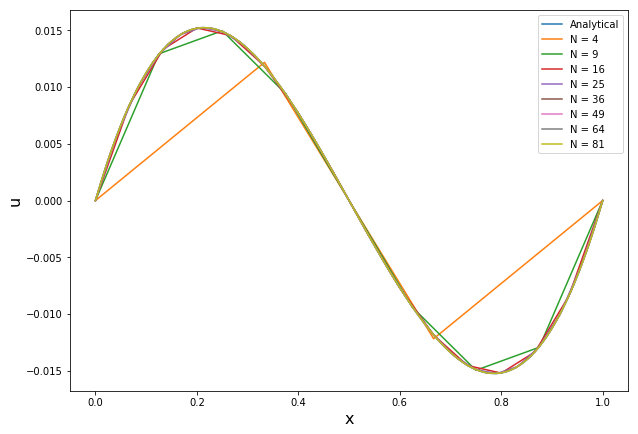

In [201]:
x = np.linspace(0,1,100)
plt.figure(1, (10, 7))
plt.plot(x, analytical(100), label = "Analytical")
for i in range(2, 10):
    N = i **2
    x  = np.linspace(0, 1, N)
    plt.plot(x, oned_solve(N), label = "N = " + str(i ** 2))

plt.xlabel("x", size = 16)
plt.ylabel("u", size = 16)
plt.legend()
plt.show()

The error can be calculated using formula $\sqrt{h}\|u_{analytical} - u\|$.

In [204]:
def error(N):
    h = 1 / (N - 1)
    return np.sqrt(h) * np.linalg.norm(analytical(N) -oned_solve(N))

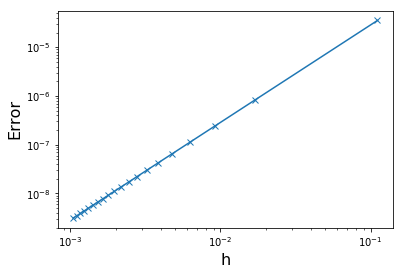

In [208]:
N = np.array(list(range(10, 1000, 50)))

#calcultating the error with different values of N and plotting them.
errors = [error(i) for i in N]
plt.loglog(1 / (N-1), errors, marker = "x")
plt.xlabel("h", size = 16)
plt.ylabel("Error", size = 16)
plt.show()


From the loglog plot we can see that the error converges with some power law as a function of the grid spacing.

In [209]:
#fitting a linear model
np.polyfit(np.log(1 / (N-1)), np.log(errors), 1)

array([ 1.9997664 , -5.85304734])

If we fit a line to the logarithm we can see that the speed of convergence is about $h^2$.

### b) Change the boundary conditions to u(0) = 0, u'(1) = 0
Let's make a new function that implements the new boundary conditions using backwards scheme for first order finite difference.

In [210]:
def neumann_oned_solve(N):
    h = 1 / (N - 1)
    
    a = np.diag(np.ones(N))
    b = np.diag(np.ones(N-1), k = 1)
    c = np.diag(np.ones(N-1), k = -1)
    
    s = (- b + 2 * a - c)
    
    #new boundary conditions, this time with backawards finite difference scheme for u'(1)
    s[0,0] = 1
    s[0, 1] = 0
    s[-1,-1] = 1
    s[-1, -2] = -1

    s *= 1 / h**2
    
    x  = np.linspace(0, 1, N)
    b = (x - 0.5)**3 - 2*(x - 0.5)
    
    b[0] = 0
    b[-1] = 0
    
    return  np.linalg.solve(s, b)

Again the analytical solutions is obtained symbolically.

In [9]:
def neumann_analytic(N):
    x = np.linspace(0, 1, N)
    return -(1 / 20 * x**5 - 1/8* x**4 - 5/24* x**3 + 7/16* x **2)

If we again calculate values for u with different grid spacings we see that the solution converges to the analytical at some rate.

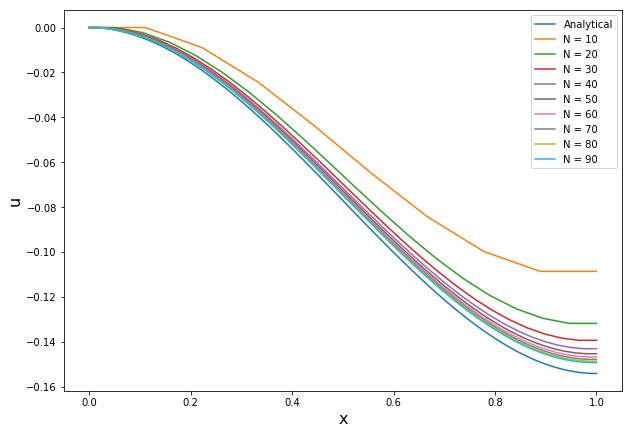

In [34]:
x = np.linspace(0,1,100)
plt.figure(1, (10,7))
plt.plot(x, neumann_analytic(100), label = "Analytical")
for i in range(1, 10):
    N = i * 10
    x  = np.linspace(0, 1, N)
    plt.plot(x, neumann_oned_solve(N), label = "N = " + str(i * 10))

plt.xlabel("x", size = 16)
plt.ylabel("u", size = 16)
plt.legend()
plt.show()

In [11]:
def neumann_error(N):
    h = 1 / (N - 1)
    return np.sqrt(h) * np.linalg.norm(neumann_analytic(N) -neumann_oned_solve(N))

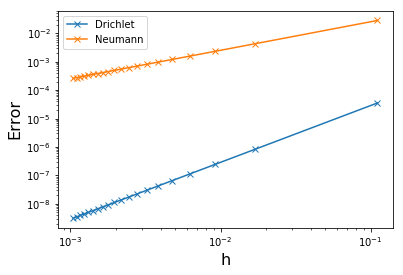

In [206]:
N = np.array(list(range(10, 1000, 50)))

neumann_errors = [neumann_error(i) for i in N]
errors = [error(i) for i in N]
plt.loglog(1/(N-1), errors, marker = "x", label = "Drichlet")
plt.loglog(1/(N-1), neumann_errors, marker = "x", label = "Neumann")
plt.xlabel("h", size = 16)
plt.ylabel("Error", size = 16)
plt.legend()
plt.show()

In [13]:
np.polyfit(np.log(1 / (N-1)), np.log(neumann_errors), 1)

array([ 1.00224725, -1.36165818])

Again if we fit a line to the loglog plot we see that the convergence follows a power law, but at this time it is just linearly. The rate is thus lower than with the dirichlet boundary conditions.

#### If we put Neumann boundary conditions on both edges we get a singular solution.

### c) Dimension 2. Implement a solver for the two-dimensional problem

In [176]:
def d2(N):
    #constructing the D matrix for 5 point stencil
    D = 4 * np.diag(np.ones(N)) - np.diag(np.ones(N-1), k = -1) - np.diag(np.ones(N-1), k = 1) 
    
    #boundary conditions
    D[0] = D[-1] = 0
    D[0,0] = D[-1,-1] = 
    
    #identity matrix for off diagonals
    I = np.diag(np.ones(N))
    IO = np.copy(I)
    
    #boundary conditions
    IO[0] = IO[-1] = 0
    
    s = np.diag(np.zeros(N**2))
    
    #filling the stencil with block matrices
    for i in range(0, N):
            if i == 0:
                #first row
                s[:N,0:N] = I
            elif i == N - 1:
                #last row
                s[i*N:,N*i:] = I
            else:
                #other rows
                s[i*N:(i+1)*N,N*(i-1):N*(i+2)] = np.hstack((-IO,D,-IO))
    
    #scaling
    s *= 1 / (1 / (N-1)**2)
    
    #the b matrix
    b = np.zeros((N,N))
    x = y = np.linspace(0,1,N)
    
    #calcultaing the values
    for i in range(N):
        for j in range(N):
            b[i, j] = np.exp(-((x[i] - 0.5)**2 + (y[j]-0.5)**2) / 18
                             
    #boundary conditions
    b[0,:] = 0
    b[:,0] = 0
    b[-1,:] = 0
    b[:,-1] = 0
                             
    #flatten the matrix for 1-d array
    b = b.flatten()
            
    #solve the system
    z = np.linalg.solve(s, b).reshape((N,N))
    
    return x,y,z

### Plotting a heatmap of the solution

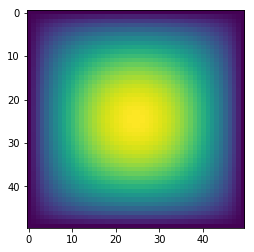

In [194]:
plt.imshow(d2(50)[-1])

### Same in 3D

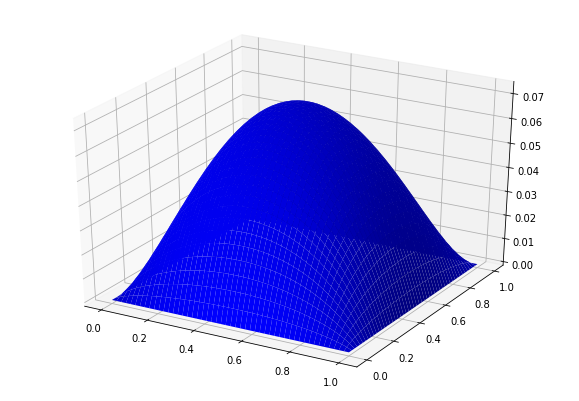

In [197]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1, (10, 7))
ax = fig.add_subplot(111, projection='3d')

sol = d2(50)

X, Y = np.meshgrid(sol[0], sol[1])
# Plot the surface
ax.plot_surface(X, Y, sol[2], color='b')

plt.show()

We seem to get a solution with this solver.

Since this problem does not have an analytical solution we can investigate the error by calcultaing the solution with a dense grid and see how the solution converges to that.

In [212]:
from scipy.interpolate import interp2d

In [213]:
analytical = d2(100)

In [217]:
errors = []
hs = []
for i in range(10, 100,10):
    hs.append(1 / (i -1))
    print(i)
    s = d2(i)
    #interpolate the sparser solution unto a tighter "analytical solution" grid
    interp = interp2d(s[0], s[1], s[2])
    polated = interp(analytical[0], analytical[1])
    #calculate the error as the Frobenius norm of the solution matrices
    errors.append(np.linalg.norm(analytical[2] - polated)* 1 / (i - 1))

10
20
30
40
50
60
70
80
90


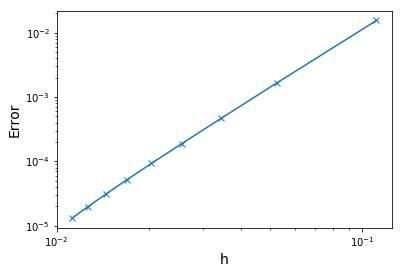

In [218]:
plt.loglog(hs, errors, marker = "x")
plt.xlabel("h", size = 14)
plt.ylabel("Error", size = 14)
plt.show()

In [219]:
np.polyfit(np.log(hs), np.log(errors), 1)

array([3.0820963 , 2.66533682])

Again if we fit a line we see that the convergence rate is about $h^3$

### d) I used 8 hours for this exercise